<a href="https://colab.research.google.com/github/falahamro/Data-Science--Foreseeing-Variable-Problems-in-Building-ML-Models/blob/main/Identifying_a_linear_relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear models assume that the dependent variables X take a linear relationship with the dependent variable Y. If the assumption is not met, the model may show poor performance. In this recipe, we will learn how to visualize the linear relationships between X and Y.

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

In [2]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Linear relationships can be assessed by scatter plots.

In [7]:
# create a toy dataframe with an x variable that follows a normal distrubtion and shows a linear relationship with y variable 

# x is a variable with 200 observations that are normally distributed: 

np.random.seed()
x = np.random.randn(200)
print(x)

[-0.06172265 -0.42526557 -0.63941801 -0.67288581 -0.65883185  0.72602342
 -1.00349036 -0.04815444  0.67482878 -0.99440035 -0.46718443  1.54047897
  0.06905295 -0.62834179  0.20973581 -2.21958507 -1.01076654  0.63231998
 -0.17844069 -0.91887449  0.40306081 -0.81820113  0.65413667 -0.05869072
  0.88824282  0.22893822  0.06278179  0.34038619 -1.92529183 -1.60776656
 -0.69044147 -0.80436867  0.34151458  1.24980401  0.54447743  1.71142287
  1.14814977  0.47775335 -0.15103775  1.08841238 -0.13327658 -0.43728507
 -0.9693323  -0.15351751  0.21137125 -0.68238703 -0.22673977  0.18089737
 -0.80228079 -0.67038672  1.56461232 -0.86527477 -0.8792232   0.13127215
  2.5421186   1.03422944  2.27376491 -0.90249077 -1.33744097  0.12248712
  0.68204443 -0.05022786  0.24834877  0.48222302  0.15154995 -0.30990658
  1.64434571  1.28842342  0.1744668  -0.3354181   1.44681652 -1.16173594
  1.09181606  2.43825709 -0.13214872 -0.84886876  1.2180707   0.4420969
  0.16967184  1.10063349 -0.76612071 -1.07590635 -0.

In [9]:
# let's create a y variable that is linearly related to x with some added random noise: 

y = x * 10 + np.random.randn(200) * 2

In [10]:
y

array([ -2.54649521,  -4.0347157 ,  -5.91592445,  -3.08570288,
        -4.40887942,   5.9251131 ,  -9.91654056,  -3.49134919,
         6.13818292,  -9.95955827,  -7.45385271,  17.10793417,
         1.02055908,  -4.72384678,   2.58086881, -21.61364339,
       -10.47807703,   5.75047646,  -1.01737698, -11.97257437,
         2.64163525,  -6.83964868,   6.39395685,  -2.72741113,
         9.72901856,   2.22072086,  -0.858833  ,   3.23515764,
       -18.18709304, -15.99761102,  -7.09942417,  -9.71426093,
         4.88112485,  12.73365353,   8.73726806,  16.5127242 ,
         7.08580374,   6.23818665,  -1.40299064,  12.02718997,
        -1.83263561,  -5.08338314,  -8.60807619,  -0.96298663,
        -0.06348572,  -4.83344437,  -4.06521231,   1.37478614,
        -6.73881289,  -7.07488322,  17.94534974,  -4.26743862,
        -7.96870603,   3.75640194,  26.76726881,   9.27315616,
        26.20752377,  -9.28174143, -13.21429197,   1.44026683,
         5.49062013,  -0.25517298,   5.22054475,   8.12

In [12]:
# let's create our data from with the x and y variables: 

data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']

In [13]:
data

,x,y
0,-0.061723,-2.546495
1,-0.425266,-4.034716
2,-0.639418,-5.915924
3,-0.672886,-3.085703
4,-0.658832,-4.408879
...,...,...
195,0.508011,2.819820
196,1.687497,17.480919
197,0.199146,3.691246
198,-0.020450,4.336084


Text(0.5, 20.80000000000002, 'Independent Variable')

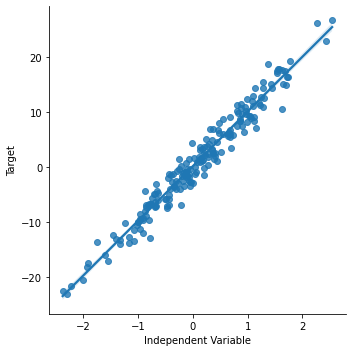

In [15]:
# let's visualize the linear relationships using a scatter plot 

sns.lmplot(x = "x", y = "y", data = data, order=1)
plt.ylabel('Target')
plt.xlabel('Independent Variable')

In [16]:
# to evaluate the linear relationship using residual plats, we need to first build a linear regression model between x and y:

linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

In [17]:
# let's make predictions of y using the fitted linear model: 

predictions = linreg.predict(data['x'].to_frame())

# find the difference between the predictions and the real outcome, y, that's the residuals 


residuals = data['y'] - predictions 

Text(0.5, 0, 'Independent variable x')

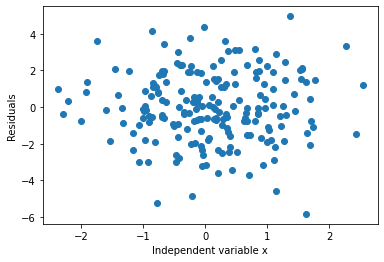

In [18]:
# Let's make a scatter plot of the indepedent variable x and the residuals: 

plt.scatter (y=residuals, x = data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

Text(0.5, 6.79999999999999, 'Residuals')

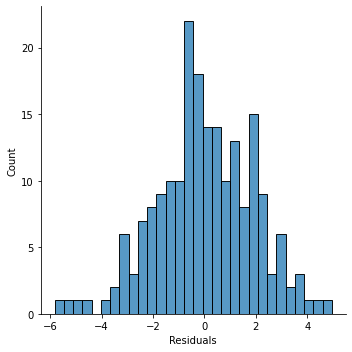

In [19]:
#let's evaualte the distribution of the residuals: 

sns.displot(residuals, bins = 30)
plt.xlabel('Residuals')